In [1]:
import pandas as pd
import os

current_directory = os.getcwd()
print(f"\nCurrent working directory: {current_directory}\n")

path_data = "Datasets/covid19-cough-audio-classification"
filename = os.path.join(path_data, "metadata_compiled.csv")

data = pd.read_csv(filename, encoding="latin-1")


Current working directory: /Users/vinni/Desktop/Code/Audio Data Science/GeoCougher



In [2]:
data.head()

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Die Spalten des Datensatzes

In [3]:
data.columns

Index(['uuid', 'datetime', 'cough_detected', 'SNR', 'latitude', 'longitude',
       'age', 'gender', 'respiratory_condition', 'fever_muscle_pain', 'status',
       'quality_1', 'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1',
       'choking_1', 'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1',
       'quality_2', 'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2',
       'choking_2', 'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2',
       'quality_3', 'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3',
       'choking_3', 'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3',
       'quality_4', 'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4',
       'choking_4', 'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

#### Count of non-null values
- alle Spalten unterhalb von 'Status' scheinen irrellevant

In [4]:
data.count()

uuid                     27550
datetime                 27550
cough_detected           27550
SNR                      27550
latitude                 16084
longitude                16084
age                      15218
gender                   16224
respiratory_condition    16224
fever_muscle_pain        16224
status                   16224
quality_1                  820
cough_type_1               802
dyspnea_1                  820
wheezing_1                 820
stridor_1                  820
choking_1                  820
congestion_1               820
nothing_1                  820
diagnosis_1                802
severity_1                 802
quality_2                  820
cough_type_2               801
dyspnea_2                  820
wheezing_2                 820
stridor_2                  820
choking_2                  820
congestion_2               820
nothing_2                  820
diagnosis_2                802
severity_2                 802
quality_3                  820
cough_ty

Hier entsteht der um die erwähnten Spalten gekürtzte Dataframe

In [5]:
data_cut = data[['uuid','datetime','cough_detected','SNR','latitude','longitude','age','gender','respiratory_condition','fever_muscle_pain','status']]

#### Structure of Dataset

In [6]:
data_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27550 entries, 0 to 27549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uuid                   27550 non-null  object 
 1   datetime               27550 non-null  object 
 2   cough_detected         27550 non-null  float64
 3   SNR                    27550 non-null  float64
 4   latitude               16084 non-null  float64
 5   longitude              16084 non-null  float64
 6   age                    15218 non-null  float64
 7   gender                 16224 non-null  object 
 8   respiratory_condition  16224 non-null  object 
 9   fever_muscle_pain      16224 non-null  object 
 10  status                 16224 non-null  object 
dtypes: float64(5), object(6)
memory usage: 2.3+ MB


#### Summary statistics für SNR, age, und cough_detected

In [7]:
data_cut[['cough_detected', 'SNR', 'age']].describe()

,cough_detected,SNR,age
count,27550.000000,2.755000e+04,15218.000000
mean,0.649544,inf,36.800611
std,0.387850,NaN,14.599737
min,0.000000,-4.718740e+00,1.000000
25%,0.208225,5.794974e+00,26.000000
50%,0.871300,1.212098e+01,35.000000
75%,0.986300,1.977735e+01,46.000000
max,1.000000,inf,102.000000


#### Alle Null Values identifizieren und entsprechende Zeilen streichen

In [8]:
data_cut.isnull() 
data_cut.dropna()

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,healthy
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,healthy
8,001e2f19-d81c-4029-b33c-d2db56b23a4a,2020-10-18T15:11:02.106636+00:00,0.7811,12.566406,45.7,4.9,20.0,male,True,False,healthy
11,00291cce-36a0-4a29-9e2d-c1d96ca17242,2020-04-13T15:10:58.405156+00:00,0.9883,14.603851,39.4,67.2,15.0,male,False,False,healthy
19,0037f67c-0d6f-42e6-ab94-66499d4d2bf4,2020-04-13T18:59:02.106014+00:00,0.8109,15.697757,41.1,28.8,39.0,other,False,False,healthy
...,...,...,...,...,...,...,...,...,...,...,...
27541,ffe5e2a4-ef67-464d-b1cd-b0e321f6a2dd,2020-04-22T05:40:51.730942+00:00,0.5591,11.209351,13.0,77.6,26.0,male,False,False,healthy
27542,ffedc843-bfc2-4ad6-a749-2bc86bdac84a,2020-06-05T03:41:37.481463+00:00,1.0000,33.661082,-34.5,-58.5,23.0,male,False,False,healthy
27543,ffeea120-92a4-40f9-b692-c3865c7a983f,2020-05-02T10:18:27.348859+00:00,0.9784,9.635425,14.3,121.1,22.0,female,False,False,healthy
27544,fff13fa2-a725-49ef-812a-39c6cedda33d,2020-04-13T17:51:36.956822+00:00,0.7154,14.162062,31.9,34.7,21.0,male,True,False,healthy


#### Verteilung der Geschlechter und Altersgruppen

<Axes: >

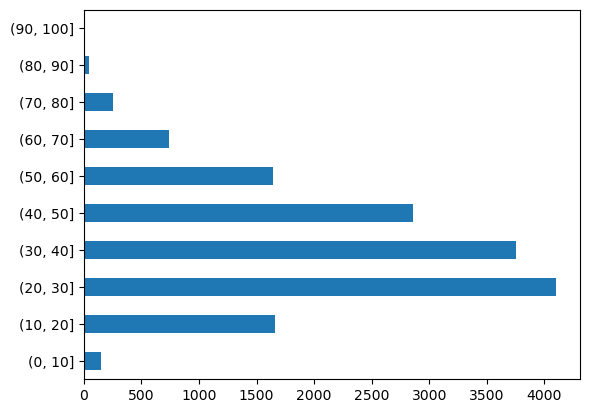

In [9]:
bins_age = [0,10,20,30,40,50,60,70,80,90,100]
altersgruppen = pd.cut(data_cut['age'], bins =bins_age)
altersgruppen.value_counts().sort_index().plot(kind ='barh')

<Axes: >

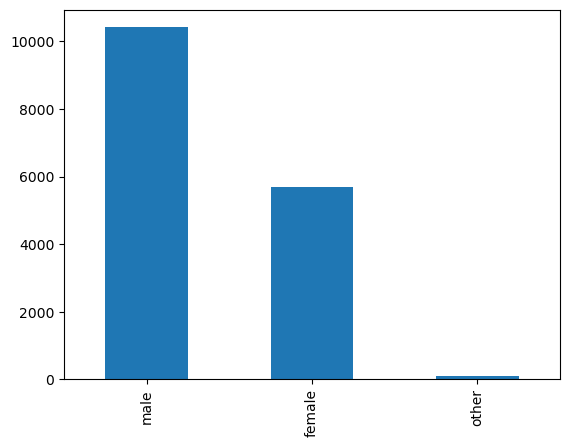

In [10]:
data_cut['gender'].value_counts().plot(kind= 'bar')

Für die SNR Werte gilt 
- Je höher der Wert, desto lauter ist das relevante Audiosignal im Verhältniss zu Hintergrundgeräuschen/ Rauschen
- Es gilt festzustellen, wo ein entsprechender Threshhold gesetzt werden müsste unterhalb derer, die Audiosamples für die Weiterverarbeitung ungeeignet sind
    - Evtl. lassen sich vorab gewisse Methoden zur Rauschunterdrückung auf die Audiosamples anwenden
- Problem: Unplausible Werte bei der Erfassung der grundliegenden statistischen Werte

#### Analyse der Qualität der Aufnahmen anhand der SNR 

<Axes: >

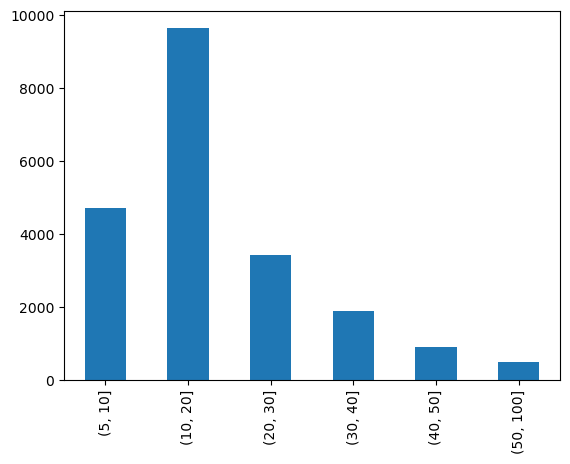

In [14]:
bins_snr = [5,10,20,30,40,50,100]
snr_bereiche = pd.cut(data_cut['SNR'], bins =bins_snr)
snr_bereiche.value_counts().sort_index().plot(kind ='bar')

Da sich die meisten Samples unterhalb eines SNR Index von 20 befinden, gilt es heraus zu finden wie die Audiofiles bei dieser SNR klingen

In [30]:
snr_20 = data_cut[data_cut['SNR']<20]
snr_20.tail()

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status
27541,ffe5e2a4-ef67-464d-b1cd-b0e321f6a2dd,2020-04-22T05:40:51.730942+00:00,0.5591,11.209351,13.0,77.6,26.0,male,False,False,healthy
27543,ffeea120-92a4-40f9-b692-c3865c7a983f,2020-05-02T10:18:27.348859+00:00,0.9784,9.635425,14.3,121.1,22.0,female,False,False,healthy
27544,fff13fa2-a725-49ef-812a-39c6cedda33d,2020-04-13T17:51:36.956822+00:00,0.7154,14.162062,31.9,34.7,21.0,male,True,False,healthy
27545,fff30afc-db62-4408-a585-07ca9a254fcc,2020-11-05T08:26:04.219206+00:00,0.9698,11.109221,40.7,29.8,NaN,NaN,NaN,NaN,NaN
27548,fffaa9f8-4db0-46c5-90fb-93b7b014b55d,2020-04-13T18:58:26.954663+00:00,0.0243,8.825849,41.0,28.8,50.0,male,True,True,healthy


Es zeigt sich, nach stichprobeartigem Hören der Samples mit einer SNR < 20, dass die Audioaufnahmen zwar bzgl. ihrer Audioqualität stark schwanken, es sich jedoch nicht jedesmal um die Aufnahme eines Husters handelt. Es liegen aucin diesen Fällen z.B Gespräche oder andere Geräusche vor.

Um dieses Problem zu umgehen, scheinen die Werte aus der Spalte 'cough_detected' als Filterkreterium passend.
Somit sollten die Audiosamples primär hierüber gefiltert werden. Allerdings scheint ein Threshhold der SNR unterhalb von 10 als Sinnvoll.

In [44]:
data_cough = data_cut[data_cut['cough_detected']> 0.7]
data_cough.tail()

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status
27542,ffedc843-bfc2-4ad6-a749-2bc86bdac84a,2020-06-05T03:41:37.481463+00:00,1.0000,33.661082,-34.5,-58.5,23.0,male,False,False,healthy
27543,ffeea120-92a4-40f9-b692-c3865c7a983f,2020-05-02T10:18:27.348859+00:00,0.9784,9.635425,14.3,121.1,22.0,female,False,False,healthy
27544,fff13fa2-a725-49ef-812a-39c6cedda33d,2020-04-13T17:51:36.956822+00:00,0.7154,14.162062,31.9,34.7,21.0,male,True,False,healthy
27545,fff30afc-db62-4408-a585-07ca9a254fcc,2020-11-05T08:26:04.219206+00:00,0.9698,11.109221,40.7,29.8,NaN,NaN,NaN,NaN,NaN
27549,fffce9f0-a5e8-4bee-b13b-c671aac4a61c,2020-04-14T13:02:33.307684+00:00,0.9754,26.774745,41.0,28.7,NaN,NaN,NaN,NaN,NaN


Die Audioqualität und Durchhörbarkeit des Cough steigt mit dem Wert der 'cough_detection'. 
Der SNR- Wert scheint für die Durchhörbarkeit eine untergeordnete Rolle zu spielen und kann voraussichtlich vernachlässigt werden.
Ab einem Wert der 'cough_detection' von ca. _0.7_ handelt es sich scheinbar um tatsächliche Coughs. Jedoch sind die Audiosamples unterhalb von einem Wert con _0.9_ häufig noch mit leisen Hintergrundgeräuschen Belegt. Die Audioqualität (Auflösung, Clipping etc.) scheint ab einem Wert von _0.8_ ausreichend zu sein.

Um einen Überblick über die Verteilung der Audiosamples in Abhängigkeit des Wertes aus der 'cough_detected' zu bekommen, wird hier die entsprechende Verteilung geplottet.

<Axes: >

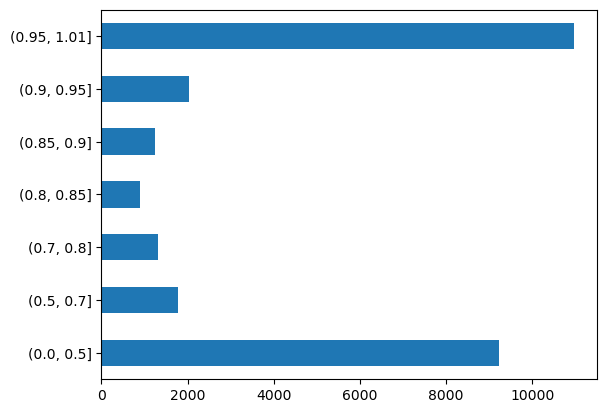

In [45]:
bins_detection = [0,0.5,0.7,0.8,0.85,0.9,0.95,1.01]
cough_pobability = pd.cut(data_cut['cough_detected'], bins =bins_detection)
cough_pobability.value_counts().sort_index().plot(kind ='barh')